In [ ]:
!kaggle datasets download -d sameeraalkhalifi/online-retail-dataset

Dataset URL: https://www.kaggle.com/datasets/sameeraalkhalifi/online-retail-dataset
License(s): Apache 2.0
online-retail-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip /content/online-retail-dataset.zip

Archive:  /content/online-retail-dataset.zip
replace Online Retail.xlsx? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

# **1. Importing Necessary Dependencies**

In [ ]:
import numpy as np
import pandas as pd
import geopandas as gpd
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot
from matplotlib import pyplot as plt
import seaborn as sns
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.frequent_patterns import fpgrowth
import networkx as nx

# **2. Loading and Reading Dataset**

In [ ]:
df=pd.read_excel('Online Retail.xlsx')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
print("Dataset dimension :", df.shape)
print("Dataset size      :", df.size)

Dataset dimension : (541909, 8)
Dataset size      : 4335272


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
df.info()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [ ]:
df.StockCode.nunique()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



4070

In [ ]:
df.describe()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


In [ ]:
df.isnull().sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [ ]:
df2=df.iloc[:,[1,2]]
df2.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,StockCode,Description
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER
1,71053,WHITE METAL LANTERN
2,84406B,CREAM CUPID HEARTS COAT HANGER
3,84029G,KNITTED UNION FLAG HOT WATER BOTTLE
4,84029E,RED WOOLLY HOTTIE WHITE HEART.


In [ ]:
df.pop('Description')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



0          WHITE HANGING HEART T-LIGHT HOLDER
1                         WHITE METAL LANTERN
2              CREAM CUPID HEARTS COAT HANGER
3         KNITTED UNION FLAG HOT WATER BOTTLE
4              RED WOOLLY HOTTIE WHITE HEART.
                         ...                 
541904            PACK OF 20 SPACEBOY NAPKINS
541905           CHILDREN'S APRON DOLLY GIRL 
541906          CHILDRENS CUTLERY DOLLY GIRL 
541907        CHILDRENS CUTLERY CIRCUS PARADE
541908          BAKING SET 9 PIECE RETROSPOT 
Name: Description, Length: 541909, dtype: object

In [ ]:
df.pop('CustomerID')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



0         17850.0
1         17850.0
2         17850.0
3         17850.0
4         17850.0
           ...   
541904    12680.0
541905    12680.0
541906    12680.0
541907    12680.0
541908    12680.0
Name: CustomerID, Length: 541909, dtype: float64

In [ ]:
df.drop_duplicates(inplace=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
df.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



(536639, 6)

In [ ]:
df['Quantity'].unique()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



array([     6,      8,      2,     32,      3,      4,     24,     12,
           48,     18,     20,     36,     80,     64,     10,    120,
           96,     23,      5,      1,     -1,     50,     40,    100,
          192,    432,    144,    288,    -12,    -24,     16,      9,
          128,     25,     30,     28,      7,     56,     72,    200,
          600,    480,     -6,     14,     -2,     11,     33,     13,
           -4,     -5,     -7,     -3,     70,    252,     60,    216,
          384,    -10,     27,     15,     22,     19,     17,     21,
           34,     47,    108,     52,  -9360,    -38,     75,    270,
           42,    240,     90,    320,   1824,    204,     69,    -36,
         -192,   -144,    160,   2880,   1400,     39,    -48,    -50,
           26,   1440,     31,     82,     78,     97,     98,     35,
           57,    -20,    110,    -22,    -30,    -70,   -130,    -80,
         -120,    -40,    -25,    -14,    -15,    -69,   -140,   -320,
      

In [ ]:
df = df[df['Quantity'] > 0]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
df.Country.nunique()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



38

# **3. Data Exploration and Visualization**

In [ ]:
itemFrequency = df['StockCode'].value_counts().sort_values(ascending=False)
itemFrequency.head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



StockCode
85123A    2258
85099B    2112
22423     2009
47566     1700
20725     1582
84879     1476
22197     1418
22720     1394
21212     1352
22383     1307
Name: count, dtype: int64

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



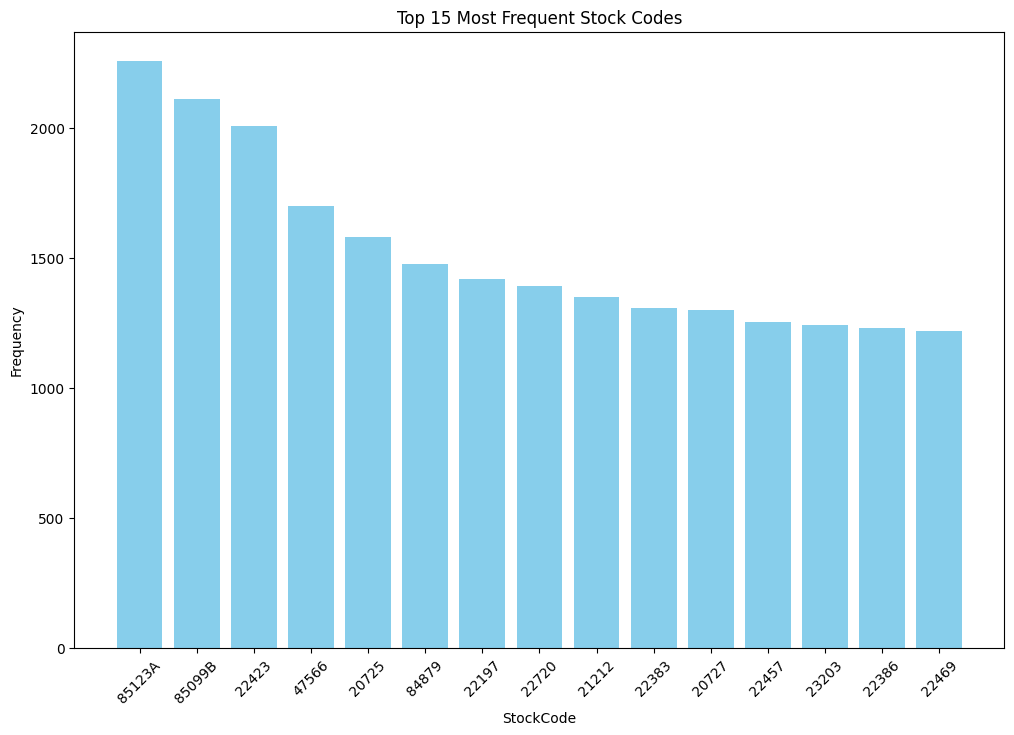

In [ ]:
freq=itemFrequency.head(15)
items = freq.index.astype(str)
frequencies = freq.values

plt.figure(figsize=(12, 8))
plt.bar(items, frequencies, color='skyblue')
plt.xlabel('StockCode')
plt.ylabel('Frequency')
plt.title('Top 15 Most Frequent Stock Codes')
plt.xticks(rotation=45)
plt.show()


In [ ]:
def get_daypart(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

df['DayPart'] = df['InvoiceDate'].dt.hour.apply(get_daypart)
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,Country,DayPart
0,536365,85123A,6,2010-12-01 08:26:00,2.55,United Kingdom,Morning
1,536365,71053,6,2010-12-01 08:26:00,3.39,United Kingdom,Morning
2,536365,84406B,8,2010-12-01 08:26:00,2.75,United Kingdom,Morning
3,536365,84029G,6,2010-12-01 08:26:00,3.39,United Kingdom,Morning
4,536365,84029E,6,2010-12-01 08:26:00,3.39,United Kingdom,Morning


In [ ]:
peakHours = df.groupby('DayPart')['StockCode'].count().sort_values(ascending=False)
peakHours

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



DayPart
Afternoon    340471
Morning      146181
Evening       39400
Name: StockCode, dtype: int64

In [ ]:
fig = go.Figure(data=[go.Pie(labels=['Afternoon','Morning','Evening','Night'],
                values=peakHours, title="Peak Selling Hours",titlefont=dict(size=20), textinfo='label+percent', marker=dict(colors=px.colors.sequential.Mint), hole=.5)])
fig.update_layout(margin=dict(t=40, b=40, l=0, r=0), font=dict(size=13), showlegend=False)
fig.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
df['Day']=df.InvoiceDate.dt.day_name()
df['Month']=df.InvoiceDate.dt.month_name()
df['Year']=df.InvoiceDate.dt.year
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,Country,DayPart,Day,Month,Year
0,536365,85123A,6,2010-12-01 08:26:00,2.55,United Kingdom,Morning,Wednesday,December,2010
1,536365,71053,6,2010-12-01 08:26:00,3.39,United Kingdom,Morning,Wednesday,December,2010
2,536365,84406B,8,2010-12-01 08:26:00,2.75,United Kingdom,Morning,Wednesday,December,2010
3,536365,84029G,6,2010-12-01 08:26:00,3.39,United Kingdom,Morning,Wednesday,December,2010
4,536365,84029E,6,2010-12-01 08:26:00,3.39,United Kingdom,Morning,Wednesday,December,2010


In [ ]:
mpd = df.groupby('Day')['StockCode'].count().sort_values(ascending=False)
mpd

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Day
Thursday     100427
Tuesday       99066
Monday        92638
Wednesday     91709
Friday        79869
Sunday        62343
Name: StockCode, dtype: int64

In [ ]:
fig = px.bar(mpd, title='Most Productive Day', color=mpd, color_continuous_scale=px.colors.sequential.Mint)
fig.update_layout(margin=dict(t=50, b=0, l=0, r=0), titlefont=dict(size=20), xaxis_tickangle=0, plot_bgcolor='white', coloraxis_showscale=False)
fig.update_yaxes(showticklabels=False, title=' ')
fig.update_xaxes(title=' ')
fig.update_traces(texttemplate='%{y}', textposition='outside', hovertemplate = '<b>%{x}</b><br>No. of Transactions: %{y}')
fig.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
mpm = df.groupby('Month')['StockCode'].count().sort_values(ascending=False)
mpm

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Month
November     82132
December     66049
October      58629
September    48962
July         38466
May          36043
June         35793
March        35609
August       34347
January      34104
April        28957
February     26961
Name: StockCode, dtype: int64

In [ ]:
fig = px.bar(mpm, title='Most Productive Month', color=mpm, color_continuous_scale=px.colors.sequential.Mint)
fig.update_layout(margin=dict(t=50, b=0, l=0, r=0), titlefont=dict(size=20), xaxis_tickangle=0, plot_bgcolor='white', coloraxis_showscale=False)
fig.update_yaxes(showticklabels=False, title=' ')
fig.update_xaxes(title=' ')
fig.update_traces(texttemplate='%{y}', textposition='outside', hovertemplate = '<b>%{x}</b><br>No. of Transactions: %{y}')
fig.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
countries=df.groupby('Country')['StockCode'].count().sort_values(ascending=False)
countries

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Country
United Kingdom          481141
Germany                   9027
France                    8393
EIRE                      7883
Spain                     2480
Netherlands               2363
Belgium                   2031
Switzerland               1959
Portugal                  1492
Australia                 1184
Norway                    1072
Italy                      758
Channel Islands            747
Finland                    685
Cyprus                     603
Sweden                     450
Unspecified                442
Austria                    398
Denmark                    380
Poland                     330
Japan                      321
Israel                     292
Hong Kong                  280
Singapore                  222
Iceland                    182
USA                        179
Canada                     151
Greece                     145
Malta                      112
United Arab Emirates        68
European Community          60
RSA                         58


In [ ]:
df = df.drop(df[(df['Country'] == 'Israel') | (df['Country'] == 'Unspecified')].index)
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,Country,DayPart,Day,Month,Year
0,536365,85123A,6,2010-12-01 08:26:00,2.55,United Kingdom,Morning,Wednesday,December,2010
1,536365,71053,6,2010-12-01 08:26:00,3.39,United Kingdom,Morning,Wednesday,December,2010
2,536365,84406B,8,2010-12-01 08:26:00,2.75,United Kingdom,Morning,Wednesday,December,2010
3,536365,84029G,6,2010-12-01 08:26:00,3.39,United Kingdom,Morning,Wednesday,December,2010
4,536365,84029E,6,2010-12-01 08:26:00,3.39,United Kingdom,Morning,Wednesday,December,2010


In [ ]:
countries=df.groupby('Country')['StockCode'].count().sort_values(ascending=False)
countries

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Country
United Kingdom          481141
Germany                   9027
France                    8393
EIRE                      7883
Spain                     2480
Netherlands               2363
Belgium                   2031
Switzerland               1959
Portugal                  1492
Australia                 1184
Norway                    1072
Italy                      758
Channel Islands            747
Finland                    685
Cyprus                     603
Sweden                     450
Austria                    398
Denmark                    380
Poland                     330
Japan                      321
Hong Kong                  280
Singapore                  222
Iceland                    182
USA                        179
Canada                     151
Greece                     145
Malta                      112
United Arab Emirates        68
European Community          60
RSA                         58
Lebanon                     45
Lithuania                   35


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

<ipython-input-32-1409f2627554>:5: FutureWarning:

The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.



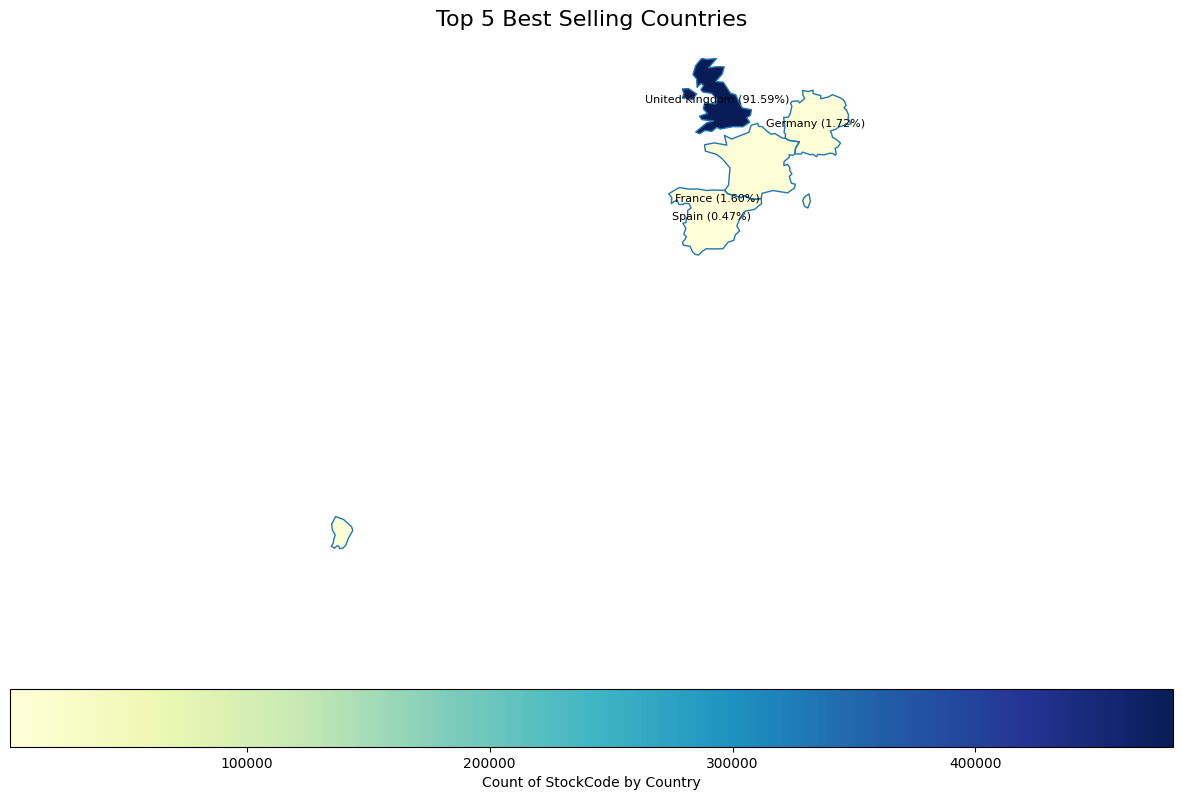

In [ ]:

country_data = pd.DataFrame({
    'Country': countries.index,
    'Count': countries.values
})
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world = world.merge(country_data, how='left', left_on='name', right_on='Country')

total_count = country_data['Count'].sum()

country_data['Percentage'] = (country_data['Count'] / total_count) * 100
world = world.merge(country_data[['Country', 'Percentage']], how='left', on='Country')
top_5_countries = country_data.nlargest(5, 'Percentage')['Country']
world_top_5 = world[world['Country'].isin(top_5_countries)]

fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world_top_5.boundary.plot(ax=ax, linewidth=1)
world_top_5.plot(column='Count', ax=ax, legend=True,
                 legend_kwds={'label': "Count of StockCode by Country",
                              'orientation': "horizontal"},
                 missing_kwds={'color': 'lightgrey'},
                 cmap='YlGnBu')

for idx, row in world_top_5.iterrows():
    ax.text(row.geometry.centroid.x, row.geometry.centroid.y, f"{row['Country']} ({row['Percentage']:.2f}%)",
            horizontalalignment='center', verticalalignment='center', fontsize=8)

ax.set_title('Top 5 Best Selling Countries', fontsize=16)
ax.set_axis_off()

plt.show()

**EDA Summary:**
The best-selling country is the United Kingdom, accounting for 91.59% of total stock code occurrences. Additionally, the top-selling item is the 85123A T-light holder. The majority of customers make their purchases in the afternoon, representing 64.7% of total sales. Sales peak on Thursdays and in the month of November.

# **4. Association Rules Generation**

In [ ]:
transactions = df.groupby('InvoiceNo')['StockCode'].apply(list).tolist()
transactions = [[str(item) for item in transaction] for transaction in transactions]
te = TransactionEncoder()
encodedData = te.fit(transactions).transform(transactions)
data = pd.DataFrame(encodedData, columns=te.columns_)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
frequentItems= apriori(data, use_colnames=True, min_support=0.02)
frequentItems.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,support,itemsets
0,0.025016,(15036)
1,0.022022,(15056N)
2,0.021587,(20676)
3,0.033612,(20685)
4,0.025257,(20711)


In [ ]:
rules = association_rules(frequentItems, metric="lift", min_threshold=1)
rules.antecedents = rules.antecedents.apply(lambda x: next(iter(x)))
rules.consequents = rules.consequents.apply(lambda x: next(iter(x)))
rules.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,21931,20712,0.057130,0.041532,0.021683,0.379544,9.138614,0.019311,1.544779,0.944536
1,20712,21931,0.041532,0.057130,0.021683,0.522093,9.138614,0.019311,1.972914,0.929164
2,20712,22386,0.041532,0.058772,0.020669,0.497674,8.467826,0.018228,1.873740,0.920120
3,22386,20712,0.058772,0.041532,0.020669,0.351684,8.467826,0.018228,1.478398,0.936974
4,85099B,20712,0.101029,0.041532,0.025837,0.255736,6.157591,0.021641,1.287807,0.931730


In [ ]:
rules=rules.sort_values(by='confidence', ascending=False)
rules.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
153,22699,22697,0.028927,0.048969,0.026175,0.904841,18.477861,0.024758,9.994168,0.974058
154,22697,22699,0.030569,0.051432,0.026175,0.856240,16.648042,0.024602,6.598282,0.969572
113,22698,22697,0.036992,0.048969,0.030569,0.826371,16.875404,0.028758,5.477367,0.976879
117,22698,22699,0.036992,0.051432,0.028927,0.781984,15.204272,0.027025,4.350917,0.970116
115,22697,22699,0.048969,0.051432,0.037041,0.756410,14.707030,0.034522,3.894122,0.979995


In [ ]:
rules.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



(158, 10)

In [ ]:
network_A = list(rules["antecedents"].unique())
network_B = list(rules["consequents"].unique())
node_list = list(set(network_A + network_B))
G = nx.Graph()
for i in node_list:
    G.add_node(i)
for i,j in rules.iterrows():
    G.add_edges_from([(j["antecedents"], j["consequents"])])
pos = nx.spring_layout(G, k=0.5, dim=2, iterations=400)
for n, p in pos.items():
    G.nodes[n]['pos'] = p

edge_trace = go.Scatter(x=[], y=[], line=dict(width=0.5, color='#888'), hoverinfo='none', mode='lines')
for edge in G.edges():
    x0, y0 = G.nodes[edge[0]]['pos']
    x1, y1 = G.nodes[edge[1]]['pos']
    edge_trace['x'] += tuple([x0, x1, None])
    edge_trace['y'] += tuple([y0, y1, None])

node_trace = go.Scatter(x=[], y=[], text=[], mode='markers', hoverinfo='text',
    marker=dict(showscale=True, colorscale='Burg', reversescale=True, color=[], size=15,
    colorbar=dict(thickness=10, title='Node Connections', xanchor='left', titleside='right')))
for node in G.nodes():
    x, y = G.nodes[node]['pos']
    node_trace['x'] += tuple([x])
    node_trace['y'] += tuple([y])

for node, adjacencies in enumerate(G.adjacency()):
    node_trace['marker']['color']+=tuple([len(adjacencies[1])])
    node_info = str(adjacencies[0]) +'<br>No of Connections: {}'.format(str(len(adjacencies[1])))
    node_trace['text']+=tuple([node_info])
fig = go.Figure(data=[edge_trace, node_trace],
    layout=go.Layout(title='Item Connections Network', titlefont=dict(size=20),
    plot_bgcolor='white', showlegend=False, margin=dict(b=0,l=0,r=0,t=50),
    xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
    yaxis=dict(showgrid=False, zeroline=False, showticklabels=False)))

iplot(fig)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



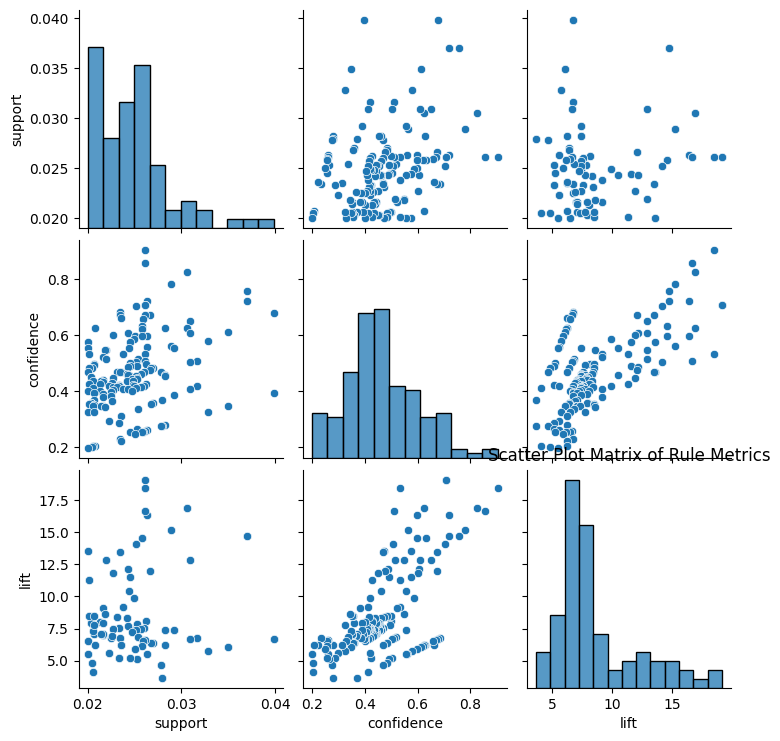

In [ ]:
sns.pairplot(rules[['support', 'confidence', 'lift']])
plt.title('Scatter Plot Matrix of Rule Metrics')
plt.show()

In [ ]:
frequent_itemsets = fpgrowth(data, min_support=0.01, use_colnames=True)
frequent_itemsets.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,support,itemsets
0,0.106341,(85123A)
1,0.022215,(84029G)
2,0.020766,(84029E)
3,0.018255,(22752)
4,0.016082,(71053)


In [ ]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.antecedents = rules.antecedents.apply(lambda x: next(iter(x)))
rules.consequents = rules.consequents.apply(lambda x: next(iter(x)))
rules.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,22633,22865,0.023132,0.031632,0.011397,0.492693,15.575872,0.010665,1.908841,0.957958
1,22865,22633,0.031632,0.023132,0.011397,0.360305,15.575872,0.010665,1.527084,0.966366
2,22633,22866,0.023132,0.026658,0.010383,0.448852,16.837634,0.009766,1.766026,0.962883
3,22866,22633,0.026658,0.023132,0.010383,0.389493,16.837634,0.009766,1.600092,0.966370
4,22865,22632,0.031632,0.018979,0.010093,0.319084,16.812396,0.009493,1.440737,0.971242


In [ ]:
rules=rules.sort_values(by='confidence', ascending=False)
rules.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
2411,22961,DOT,0.010528,0.034240,0.010093,0.958716,28.000175,0.009733,23.392862,0.974546
3108,23172,23171,0.012942,0.018351,0.012266,0.947761,51.645503,0.012029,18.791561,0.993496
1531,22916,22917,0.011445,0.011590,0.010673,0.932489,80.454413,0.010540,14.640819,0.999005
2439,22577,22578,0.012025,0.024726,0.011156,0.927711,37.519743,0.010858,13.491291,0.985194
1530,22917,22916,0.011590,0.011445,0.010673,0.920833,80.454413,0.010540,12.487005,0.999151


In [ ]:
rules.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



(3166, 10)

In [ ]:
network_A = list(rules["antecedents"].unique())
network_B = list(rules["consequents"].unique())
node_list = list(set(network_A + network_B))
G = nx.Graph()
for i in node_list:
    G.add_node(i)
for i,j in rules.iterrows():
    G.add_edges_from([(j["antecedents"], j["consequents"])])
pos = nx.spring_layout(G, k=0.5, dim=2, iterations=400)
for n, p in pos.items():
    G.nodes[n]['pos'] = p

edge_trace = go.Scatter(x=[], y=[], line=dict(width=0.5, color='#888'), hoverinfo='none', mode='lines')
for edge in G.edges():
    x0, y0 = G.nodes[edge[0]]['pos']
    x1, y1 = G.nodes[edge[1]]['pos']
    edge_trace['x'] += tuple([x0, x1, None])
    edge_trace['y'] += tuple([y0, y1, None])

node_trace = go.Scatter(x=[], y=[], text=[], mode='markers', hoverinfo='text',
    marker=dict(showscale=True, colorscale='Burg', reversescale=True, color=[], size=15,
    colorbar=dict(thickness=10, title='Node Connections', xanchor='left', titleside='right')))
for node in G.nodes():
    x, y = G.nodes[node]['pos']
    node_trace['x'] += tuple([x])
    node_trace['y'] += tuple([y])

for node, adjacencies in enumerate(G.adjacency()):
    node_trace['marker']['color']+=tuple([len(adjacencies[1])])
    node_info = str(adjacencies[0]) +'<br>No of Connections: {}'.format(str(len(adjacencies[1])))
    node_trace['text']+=tuple([node_info])
fig = go.Figure(data=[edge_trace, node_trace],
    layout=go.Layout(title='Item Connections Network', titlefont=dict(size=20),
    plot_bgcolor='white', showlegend=False, margin=dict(b=0,l=0,r=0,t=50),
    xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
    yaxis=dict(showgrid=False, zeroline=False, showticklabels=False)))

iplot(fig)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



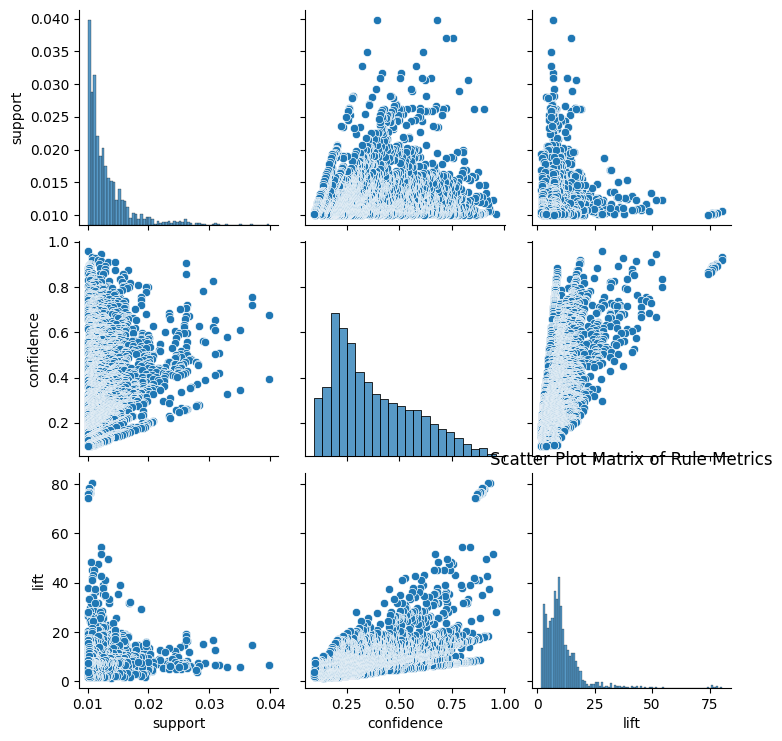

In [ ]:
sns.pairplot(rules[['support', 'confidence', 'lift']])
plt.title('Scatter Plot Matrix of Rule Metrics')
plt.show()